# Real Estate Investment Prospects On The Outskirts of Charlotte, North Carolina: a Time Series
Project: Module 4 Final
<br>
Instructor: Yish Lim
<br>
Date: 02-2021

## Client Case:
A real estate asset and investment management firm specializing in Single-Family and Build-To-Rent residences is interested in gauging the potential opportunity to invest & build BTR assets in or on the outskirts of Charlotte, North Carolina. As of February 2021, Charlotte is one of the most sought out destinations for real estate in the United States. The client has requested an analysis and forecast with regard to the best zip code(s) to invest in, within (<b>or on the outskirts of) </b>Charlotte, North Carolina, with the interest in establishing a portfolio of 10-20 homes.

Although data related to potential rental income is vital to assessing the viability of this strategy, among other aspects, the Client is firstly interested in protecting initial investments by understanding the forecasts for invidiual zip codes over the next 5 years, as the Charlotte real estate market has been steadily rising and could be a bubble on the verge of bursting.

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
sns.set()

In [319]:
#! pip install pgeocode
import pgeocode

In [247]:
# Importing the dataframe
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [248]:
len(df.CountyName.sort_values().unique())

1212

In [249]:
df.loc[df.CountyName == 'Cabarrus']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
111,69672,28027,Concord,NC,Charlotte,Cabarrus,112,126600.0,127300.0,127700.0,...,204000,205600,207300,209000,210400,212000,213700,215200,216700,218000
606,69670,28025,Concord,NC,Charlotte,Cabarrus,607,96500.0,97200.0,97600.0,...,156800,157500,158200,159000,159900,160800,161800,162400,162900,163300
3909,69702,28081,Kannapolis,NC,Charlotte,Cabarrus,3910,61900.0,62300.0,62600.0,...,117500,119600,121400,123200,124700,125600,125700,125800,126700,127500
4372,69704,28083,Kannapolis,NC,Charlotte,Cabarrus,4373,62100.0,62500.0,62800.0,...,111200,112400,113500,115000,117000,118600,119500,119800,120100,120700
6093,69696,28075,Harrisburg,NC,Charlotte,Cabarrus,6094,165300.0,166000.0,166400.0,...,262600,263200,264000,264600,265600,266800,268000,269100,269700,269700
9277,69720,28107,Midland,NC,Charlotte,Cabarrus,9278,95600.0,95500.0,95400.0,...,183700,182400,181700,182300,183500,184700,186700,188700,189900,190200
9791,69732,28124,Mount Pleasant,NC,Charlotte,Cabarrus,9792,71600.0,71700.0,71700.0,...,142100,142000,141400,141100,140900,140900,141100,143300,147900,152300


In [250]:
nc_homes_meck = df.loc[df.CountyName == 'Mecklenburg']

In [251]:
nc_homes_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,345000,348400,351700,353100,354600,356200,357400,359100,362200,363800
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,175600,177600,180000,182000,184000,185900,187200,188800,190900,192300
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,364100,366700,369700,372700,375500,378700,382300,386800,390100,390800


In [125]:
# Filtering for the zip codes that correspond to city names that are not Charlotte but are in Mecklenburg County.
outskirts_ch = nc_homes_meck.loc[nc_homes_meck.City != 'Charlotte']

In [89]:
outskirts_ch

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,69718,28105,Matthews,NC,Charlotte,Mecklenburg,1401,137800.0,138600.0,139500.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,69673,28031,Cornelius,NC,Charlotte,Mecklenburg,2456,172700.0,173700.0,174600.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,69678,28036,Davidson,NC,Charlotte,Mecklenburg,5721,179200.0,180700.0,182000.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,69740,28134,Pineville,NC,Charlotte,Mecklenburg,7527,109600.0,109800.0,110000.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [95]:
outskirts_series = outskirts_ch.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [96]:
outskirts_series

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,28078,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,28227,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,28105,137800.0,138600.0,139500.0,140300.0,141100.0,141800.0,142600.0,143400.0,144200.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,28031,172700.0,173700.0,174600.0,175300.0,175900.0,176500.0,177000.0,177700.0,178500.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,28036,179200.0,180700.0,182000.0,183100.0,184000.0,184900.0,185700.0,186600.0,187900.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,28134,109600.0,109800.0,110000.0,110200.0,110400.0,110600.0,110800.0,111000.0,111300.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [97]:
outskirts_regions = outskirts_series.RegionName

In [98]:
outskirts_years = outskirts_series.drop('RegionName', axis=1)

In [110]:
outskirts_regions

217     28078
472     28227
1400    28105
2455    28031
5720    28036
7526    28134
Name: RegionName, dtype: int64

In [112]:
zips = [i for i in outskirts_regions]

In [113]:
zips

[28078, 28227, 28105, 28031, 28036, 28134]

In [102]:
outskirts_years

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,171300.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,105800.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,137800.0,138600.0,139500.0,140300.0,141100.0,141800.0,142600.0,143400.0,144200.0,145000.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,172700.0,173700.0,174600.0,175300.0,175900.0,176500.0,177000.0,177700.0,178500.0,179500.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,179200.0,180700.0,182000.0,183100.0,184000.0,184900.0,185700.0,186600.0,187900.0,189500.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,109600.0,109800.0,110000.0,110200.0,110400.0,110600.0,110800.0,111000.0,111300.0,111700.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [103]:
# Transposing the series
outskirts_years = outskirts_years.transpose()

In [104]:
outskirts_years

,217,472,1400,2455,5720,7526
1996-04,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


In [114]:
outskirts_years = outskirts_years.rename(columns={217: zips[0], 472: zips[1],
                                                  1400: zips[2], 2455: zips[3],
                                                 5720: zips[4], 7526: zips[5]})

In [115]:
outskirts_years

,28078,28227,28105,28031,28036,28134
1996-04,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


In [116]:
ch_edge_series = outskirts_years

In [121]:
# Changing series index to datetime to make this more workable for my needs
ch_edge_series.index = pd.to_datetime(ch_edge_series.index)

In [122]:
ch_edge_series

,28078,28227,28105,28031,28036,28134
1996-04-01,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05-01,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06-01,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07-01,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08-01,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12-01,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02-01,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03-01,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


<AxesSubplot:>

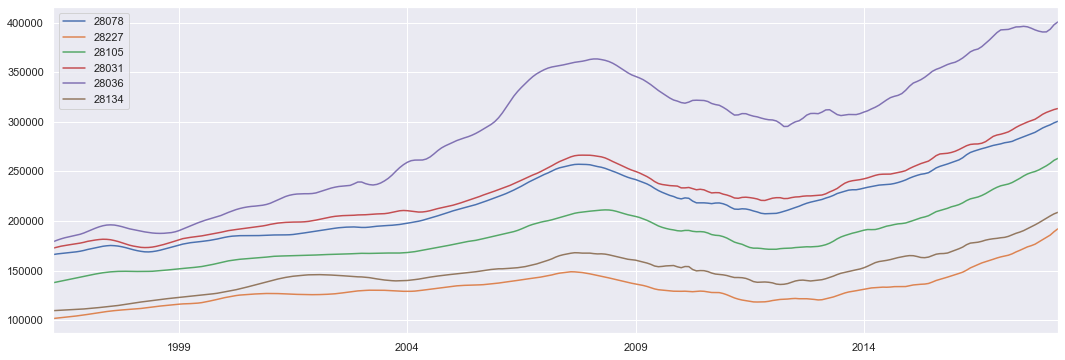

In [130]:
ch_edge_series.plot(figsize=(18,6), legend=True)

In [131]:
ch_edge_series.describe()

,28078,28227,28105,28031,28036,28134
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,217885.283019,131804.905660,183282.641509,226931.698113,288527.924528,148240.000000
std,33712.801757,16240.468489,26811.591522,34585.382583,65138.178111,20306.383904
min,166200.000000,101700.000000,137800.000000,172700.000000,179200.000000,109600.000000
25%,188000.000000,121700.000000,165200.000000,199200.000000,227500.000000,138600.000000
50%,216500.000000,129300.000000,178000.000000,225000.000000,306300.000000,145800.000000
75%,241800.000000,138000.000000,199600.000000,249700.000000,342500.000000,160900.000000
max,300500.000000,192100.000000,263100.000000,313400.000000,400700.000000,208700.000000


In [134]:
# Checking to make sure there are no NaN's
ch_edge_series.isnull().sum()

28078    0
28227    0
28105    0
28031    0
28036    0
28134    0
dtype: int64

In [135]:
ch_edge_series_2006 = ch_edge_series['2006':]

In [136]:
ch_edge_series_2006

,28078,28227,28105,28031,28036,28134
2006-01-01,224800.0,137400.0,185800.0,231600.0,304100.0,151800.0
2006-02-01,226200.0,138000.0,186600.0,233000.0,309000.0,151800.0
2006-03-01,227700.0,138500.0,187500.0,234400.0,314700.0,152000.0
2006-04-01,229400.0,139000.0,188400.0,235900.0,320500.0,152300.0
2006-05-01,231200.0,139600.0,189300.0,237600.0,325900.0,152600.0
...,...,...,...,...,...,...
2017-12-01,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02-01,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03-01,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


<AxesSubplot:>

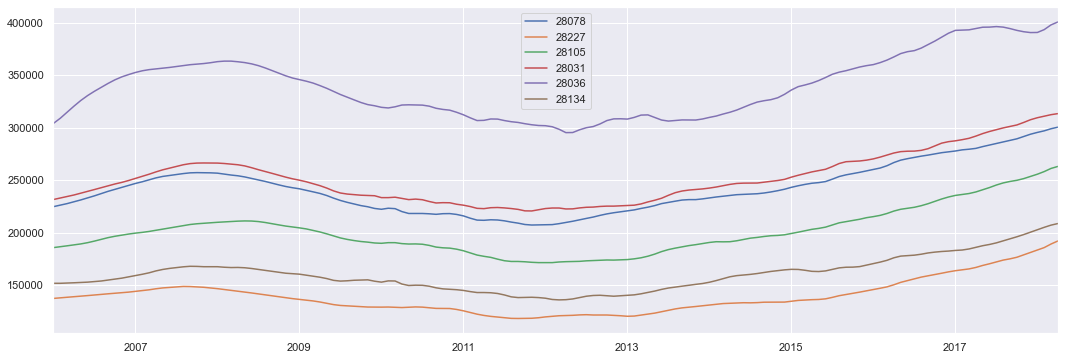

In [138]:
ch_edge_series_2006.plot(figsize=(18,6))

In [142]:
top20_meck = nc_homes_meck.loc[nc_homes_meck.SizeRank < 3508]

In [143]:
top20_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,345000,348400,351700,353100,354600,356200,357400,359100,362200,363800
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,175600,177600,180000,182000,184000,185900,187200,188800,190900,192300
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,364100,366700,369700,372700,375500,378700,382300,386800,390100,390800


In [146]:
top20_meck['hROI'] = (top20_meck['2018-04']/top20_meck['1996-04'])-1

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
top20_meck.hROI.sort_values()

918     0.535942
24      0.583664
1352    0.604972
2067    0.631631
392     0.640867
3506    0.687105
442     0.714430
1814    0.730435
217     0.808063
2455    0.814708
472     0.888889
1502    0.898534
1400    0.909289
1821    0.922034
55      0.983687
2666    1.042003
1288    1.333134
467     1.694815
2635    1.733520
409     2.607870
Name: hROI, dtype: float64

In [152]:
top20_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,186600,188200,189800,191700,193500,195100,196600,198500,199700,0.583664
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,349500,350500,352500,355400,357900,359900,361900,363800,364800,0.983687
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,286500,287900,289400,291600,293800,295500,297000,299000,300500,0.808063
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,145500,146900,148700,150600,152300,153700,155300,157400,159000,0.640867
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,153400,155500,157400,159600,162000,163800,165700,168100,169900,0.714430
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,173900,175100,176600,178900,181300,183400,185800,189200,192100,0.888889
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,177600,180000,182000,184000,185900,187200,188800,190900,192300,0.535942
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,366700,369700,372700,375500,378700,382300,386800,390100,390800,1.333134


In [155]:
top20_meck2 = top20_meck.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [156]:
top20_meck2

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
24,28269,126100.0,126600.0,127100.0,127600.0,128000.0,128300.0,128700.0,129000.0,129500.0,...,186600,188200,189800,191700,193500,195100,196600,198500,199700,0.583664
55,28277,183900.0,185100.0,186300.0,187300.0,188300.0,189200.0,190100.0,191000.0,192000.0,...,349500,350500,352500,355400,357900,359900,361900,363800,364800,0.983687
217,28078,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,...,286500,287900,289400,291600,293800,295500,297000,299000,300500,0.808063
392,28216,96900.0,97100.0,97200.0,97400.0,97600.0,97900.0,98300.0,98600.0,99100.0,...,145500,146900,148700,150600,152300,153700,155300,157400,159000,0.640867
409,28205,73700.0,74200.0,74800.0,75400.0,76000.0,76500.0,77000.0,77500.0,78000.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
442,28215,99100.0,99800.0,100500.0,101200.0,101900.0,102500.0,103100.0,103600.0,104100.0,...,153400,155500,157400,159600,162000,163800,165700,168100,169900,0.714430
467,28210,135000.0,135200.0,135400.0,135600.0,135700.0,135800.0,136000.0,136400.0,137000.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815
472,28227,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,...,173900,175100,176600,178900,181300,183400,185800,189200,192100,0.888889
918,28262,125200.0,125700.0,126300.0,126800.0,127300.0,127800.0,128200.0,128500.0,128900.0,...,177600,180000,182000,184000,185900,187200,188800,190900,192300,0.535942
1288,28226,167500.0,168300.0,169000.0,169700.0,170500.0,171100.0,171700.0,172300.0,172900.0,...,366700,369700,372700,375500,378700,382300,386800,390100,390800,1.333134


Update:
--
It seems that I missed some important entries for neighboring Charlotte area, namely both Gaston county and Cabarrus county. Due to the needs of the analysis, I'll include them in the Series.

---

In [252]:
# Beginning from "scratch" with the original dataset
# df

In [287]:
dfnc = df.loc[df.State == 'NC']

In [288]:
# Pulling the three counties of focus from the dataset 
gas = dfnc.loc[dfnc.CountyName == 'Gaston']
meck = dfnc.loc[dfnc.CountyName == 'Mecklenburg']
cab = dfnc.loc[dfnc.CountyName == 'Cabarrus']

In [293]:
# Combining these three into one dataset
gas_meck_cab = pd.concat([gas,meck,cab], join='outer')
gas_meck_cab

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1573,69688,28054,Gastonia,NC,Charlotte,Gaston,1574,70300.0,70600.0,71000.0,...,129200,130500,132100,133100,133500,134400,135900,137600,139400,140900
2368,69686,28052,Gastonia,NC,Charlotte,Gaston,2369,48300.0,48700.0,49100.0,...,78600,80000,81600,82300,82400,83100,85000,86100,86100,85600
2630,69690,28056,Gastonia,NC,Charlotte,Gaston,2631,84900.0,85200.0,85600.0,...,166000,167000,168000,169000,170100,171100,171900,172300,173400,174700
4275,69661,28012,Belmont,NC,Charlotte,Gaston,4276,82200.0,82600.0,83100.0,...,174000,176300,178800,180500,180800,180500,180300,181400,184100,186600
4805,69730,28120,Mount Holly,NC,Charlotte,Gaston,4806,83700.0,84000.0,84400.0,...,161300,162600,164100,165700,167000,168200,169000,170000,172100,174000
5943,69676,28034,Dallas,NC,Charlotte,Gaston,5944,63300.0,63500.0,63700.0,...,118500,119400,120900,122400,123900,125100,126100,126900,127700,128400
6843,69756,28164,Stanley,NC,Charlotte,Gaston,6844,73700.0,73200.0,72700.0,...,171000,171700,173700,175700,176800,177800,178300,178800,180900,183100
7127,69662,28016,Bessemer City,NC,Charlotte,Gaston,7128,55800.0,56000.0,56200.0,...,100800,101800,103200,104000,104200,104500,104900,104900,104600,104300
11312,69713,28098,Lowell,NC,Charlotte,Gaston,11313,63500.0,63800.0,64100.0,...,123200,124500,126400,127900,128700,129400,130200,131100,132200,132800
11953,69674,28032,Cramerton,NC,Charlotte,Gaston,11954,61200.0,61800.0,62400.0,...,122600,124000,125900,127200,127700,127900,128000,128400,129700,131100


Calculating Historical ROI
--
Because there are 45 zip codes, and the goal is to focus on at maximum 10, I'll calculate the historical ROI for each zip code. This is one of the key metrics used to determine feasibility for real estate investment.

In [294]:
# Calculating Historical ROI
gas_meck_cab['hROI'] = (gas_meck_cab['2018-04']/gas_meck_cab['1996-04'])-1

In [298]:
# Checking on the top zip codes according to Historical ROI
#gas_meck_cab.sort_values(by=['hROI'], ascending=False)

In [333]:
# Creating a new DF for the zip codes which have an hROI above 1.00
top_21 = gas_meck_cab.loc[gas_meck_cab.hROI >= 1.00]

In [334]:
top_21

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
1573,69688,28054,Gastonia,NC,Charlotte,Gaston,1574,70300.0,70600.0,71000.0,...,130500,132100,133100,133500,134400,135900,137600,139400,140900,1.004267
2630,69690,28056,Gastonia,NC,Charlotte,Gaston,2631,84900.0,85200.0,85600.0,...,167000,168000,169000,170100,171100,171900,172300,173400,174700,1.057715
4275,69661,28012,Belmont,NC,Charlotte,Gaston,4276,82200.0,82600.0,83100.0,...,176300,178800,180500,180800,180500,180300,181400,184100,186600,1.270073
4805,69730,28120,Mount Holly,NC,Charlotte,Gaston,4806,83700.0,84000.0,84400.0,...,162600,164100,165700,167000,168200,169000,170000,172100,174000,1.078853
5943,69676,28034,Dallas,NC,Charlotte,Gaston,5944,63300.0,63500.0,63700.0,...,119400,120900,122400,123900,125100,126100,126900,127700,128400,1.028436
6843,69756,28164,Stanley,NC,Charlotte,Gaston,6844,73700.0,73200.0,72700.0,...,171700,173700,175700,176800,177800,178300,178800,180900,183100,1.484396
11312,69713,28098,Lowell,NC,Charlotte,Gaston,11313,63500.0,63800.0,64100.0,...,124500,126400,127900,128700,129400,130200,131100,132200,132800,1.091339
11953,69674,28032,Cramerton,NC,Charlotte,Gaston,11954,61200.0,61800.0,62400.0,...,124000,125900,127200,127700,127900,128000,128400,129700,131100,1.142157
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815


In [ ]:
mapper = folium.Map(location=[35.227085, -80.843124], zoom_start=9)
mapper

In [339]:
top_21['RegionName'] = top_21['RegionName'].astype(str)

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [342]:
finder = pgeocode.Nominatim('us')

finder_results = finder.query_postal_code([i for i in top_21['RegionName']])
finder_results.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\dsc-mod-4-project-v2-1-onl01-dtsc-pt-070620\time-series\latlongs.csv', index = False)

In [ ]:
mapper.choropleth(geo_data="latlongs.geojson",
             data=top_21,
             columns=['RegionName', 'hROI'],
             key_on='feature.properties.postalCode',
             fill_color='BuGn', fill_opacity=0.7, line_opacity=0.2)

In [ ]:
#finder_results

In [ ]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(mapper)

In [ ]:
mapper